In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
%matplotlib inline

In [2]:
# Load data file
df = pd.read_csv("C:\\Users\\chara\\Downloads\\bank-full.csv") 
df.head()

,Id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1001,999.0,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,1002,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,1003,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,1004,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,1005,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
# Check if the data set contains any null values - Nothing found!
df[df.isnull().any(axis=1)].count()

Id           11
age           2
job          11
marital      11
education    11
default      11
balance       8
housing      11
loan         11
contact      11
day          11
month        11
duration     11
campaign     11
pdays        11
previous     11
poutcome     11
y            11
dtype: int64

In [4]:
df.describe()

,Id,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45202.000000,45208.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,23606.000000,40.954714,1362.346620,15.806419,258.163080,2.763841,40.197828,0.580323
std,13051.435847,11.539144,3044.852387,8.322476,257.527812,3.098021,100.128746,2.303441
min,1001.000000,-1.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,12303.500000,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,23606.000000,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,34908.500000,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,46211.000000,999.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


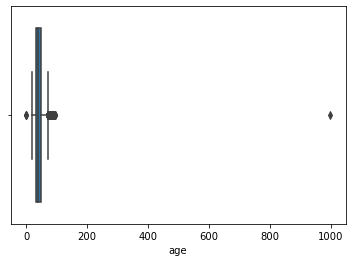

In [5]:
# Boxplot for 'age'
g = sns.boxplot(x=df["age"])

C:\Users\chara\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

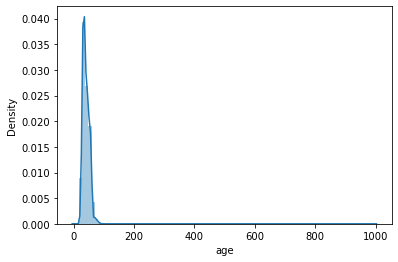

In [6]:
# Distribution of Age
sns.distplot(df.age, bins=100)

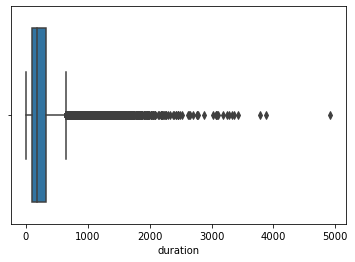

In [7]:
# Boxplot for 'duration'
g = sns.boxplot(x=df["duration"])

C:\Users\chara\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='duration', ylabel='Density'>

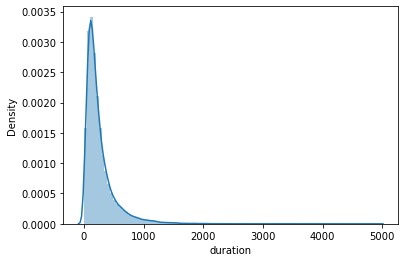

In [8]:
sns.distplot(df.duration, bins=100)

In [9]:
# Make a copy for parsing
df_data = df.copy()

In [10]:
# Explore People who made a deposit Vs Job category
jobs = ['management','blue-collar','technician','admin.','services','retired','self-employed','student',\
        'unemployed','entrepreneur','housemaid','unknown']

for j in jobs:
    print("{:15} : {:5}". format(j, len(df_data[(df_data.balance == "yes") & (df_data.job ==j)])))

management      :     0
blue-collar     :     0
technician      :     0
admin.          :     0
services        :     0
retired         :     0
self-employed   :     0
student         :     0
unemployed      :     0
entrepreneur    :     0
housemaid       :     0
unknown         :     0


In [11]:
# Different types of job categories and their counts
df_data.job.value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [12]:
# Combine similar jobs into categiroes
df_data['job'] = df_data['job'].replace(['management', 'admin.'], 'white-collar')
df_data['job'] = df_data['job'].replace(['services','housemaid'], 'pink-collar')
df_data['job'] = df_data['job'].replace(['retired', 'student', 'unemployed', 'unknown'], 'other')

In [13]:
# New value counts
df_data.job.value_counts()

white-collar     14629
blue-collar       9732
technician        7597
pink-collar       5394
other             4793
self-employed     1579
entrepreneur      1487
Name: job, dtype: int64

In [14]:
df_data.poutcome.value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [15]:
# Combine 'unknown' and 'other' as 'other' isn't really match with either 'success' or 'failure'
df_data['poutcome'] = df_data['poutcome'].replace(['other'] , 'unknown')
df_data.poutcome.value_counts()

unknown    38799
failure     4901
success     1511
Name: poutcome, dtype: int64

In [16]:
# Drop 'contact', as every participant has been contacted. 
df_data.drop('contact', axis=1, inplace=True)

In [17]:
# values for "default" : yes/no
df_data["default"]
df_data['default_cat'] = df_data['default'].map( {'yes':1, 'no':0} )
df_data.drop('default', axis=1,inplace = True)

In [18]:
# values for "housing" : yes/no
df_data["housing_cat"]=df_data['housing'].map({'yes':1, 'no':0})
df_data.drop('housing', axis=1,inplace = True)

In [19]:
# values for "loan" : yes/no
df_data["loan_cat"] = df_data['loan'].map({'yes':1, 'no':0})
df_data.drop('loan', axis=1, inplace=True)

In [20]:
# day  : last contact day of the month
# month: last contact month of year
# Drop 'month' and 'day' as they don't have any intrinsic meaning
df_data.drop('month', axis=1, inplace=True)
df_data.drop('day', axis=1, inplace=True)

In [21]:
# values for "deposit" : yes/no
df_data["balance_cat"] = df_data['balance'].map({'yes':1, 'no':0})
df_data.drop('balance', axis=1, inplace=True)

In [22]:
# pdays: number of days that passed by after the client was last contacted from a previous campaign
#       -1 means client was not previously contacted

print("Customers that have not been contacted before:", len(df_data[df_data.pdays==-1]))
print("Maximum values on padys    :", df_data['pdays'].max())

Customers that have not been contacted before: 36954
Maximum values on padys    : 871


In [23]:
# Map padys=-1 into a large value (10000 is used) to indicate that it is so far in the past that it has no effect
df_data.loc[df_data['pdays'] == -1, 'pdays'] = 10000

In [24]:
# Create a new column: recent_pdays 
df_data['recent_pdays'] = np.where(df_data['pdays'], 1/df_data.pdays, 1/df_data.pdays)

# Drop 'pdays'
df_data.drop('pdays', axis=1, inplace = True)

In [25]:
df.tail()

,Id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,46207,51.0,technician,married,tertiary,no,825.0,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,46208,71.0,retired,divorced,primary,no,1729.0,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,46209,72.0,retired,married,secondary,no,5715.0,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,46210,57.0,blue-collar,married,secondary,no,668.0,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,46211,37.0,entrepreneur,married,secondary,no,2971.0,no,no,cellular,17,nov,361,2,188,11,other,no


In [26]:
# Convert categorical variables to dummies
df_with_dummies = pd.get_dummies(data=df_data, columns = ['job', 'marital', 'education', 'poutcome'], \
                                   prefix = ['job', 'marital', 'education', 'poutcome'])
df_with_dummies.head()

,Id,age,duration,campaign,previous,y,default_cat,housing_cat,loan_cat,balance_cat,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_success,poutcome_unknown
0,1001,999.0,261,1,0,no,0,1,0,NaN,...,0,1,0,0,0,1,0,0,0,1
1,1002,44.0,151,1,0,no,0,1,0,NaN,...,0,0,1,0,1,0,0,0,0,1
2,1003,33.0,76,1,0,no,0,1,1,NaN,...,0,1,0,0,1,0,0,0,0,1
3,1004,47.0,92,1,0,no,0,1,0,NaN,...,0,1,0,0,0,0,1,0,0,1
4,1005,33.0,198,1,0,no,0,0,0,NaN,...,0,0,1,0,0,0,1,0,0,1


In [27]:
df_with_dummies.shape 

(45211, 28)

In [28]:
df_with_dummies.describe()

,Id,age,duration,campaign,previous,default_cat,housing_cat,loan_cat,balance_cat,recent_pdays,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_success,poutcome_unknown
count,45211.000000,45202.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,0.0,45211.000000,...,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,23606.000000,40.954714,258.163080,2.763841,0.580323,0.018027,0.555838,0.160226,NaN,0.002166,...,0.115171,0.601933,0.282896,0.151534,0.513194,0.294198,0.041074,0.108403,0.033421,0.858176
std,13051.435847,11.539144,257.527812,3.098021,2.303441,0.133049,0.496878,0.366820,NaN,0.024128,...,0.319232,0.489505,0.450411,0.358572,0.499831,0.455687,0.198464,0.310892,0.179735,0.348873
min,1001.000000,-1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000100,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12303.500000,33.000000,103.000000,1.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000100,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,23606.000000,39.000000,180.000000,2.000000,0.000000,0.000000,1.000000,0.000000,NaN,0.000100,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,34908.500000,48.000000,319.000000,3.000000,0.000000,0.000000,1.000000,0.000000,NaN,0.000100,...,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,46211.000000,999.000000,4918.000000,63.000000,275.000000,1.000000,1.000000,1.000000,NaN,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


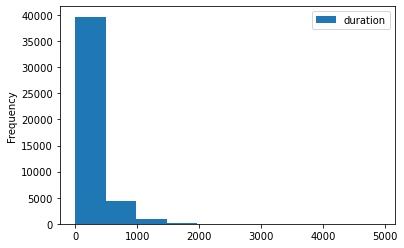

In [29]:
df_with_dummies.plot(kind='hist', x='poutcome_success', y='duration');

In [30]:
# People who sign up to a term deposite
df_with_dummies[df_data.balance_cat == 1].describe()

,Id,age,duration,campaign,previous,default_cat,housing_cat,loan_cat,balance_cat,recent_pdays,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_success,poutcome_unknown
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
# People signed up to a term deposite having a personal loan (loan_cat) and housing loan (housing_cat)
len(df_with_dummies[(df_with_dummies.balance_cat == 1) & (df_with_dummies.loan_cat) & (df_with_dummies.housing_cat)])

0

In [32]:
# People signed up to a term deposite with a credit default 
len(df_with_dummies[(df_with_dummies.balance_cat == 1) & (df_with_dummies.default_cat ==1)])

0

<AxesSubplot:xlabel='job', ylabel='balance_cat'>

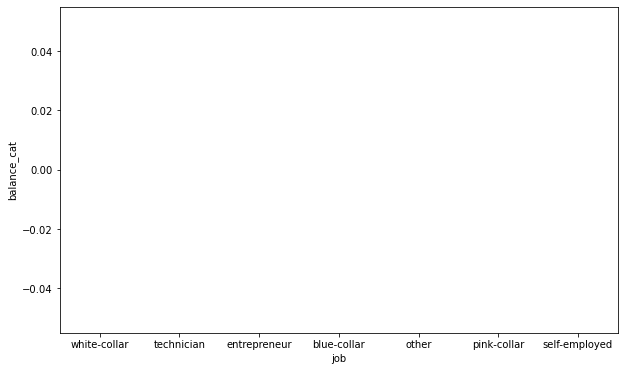

In [33]:
# Bar chart of job Vs deposite
plt.figure(figsize = (10,6))
sns.barplot(x='job', y = 'balance_cat', data = df_data)

<AxesSubplot:xlabel='poutcome', ylabel='duration'>

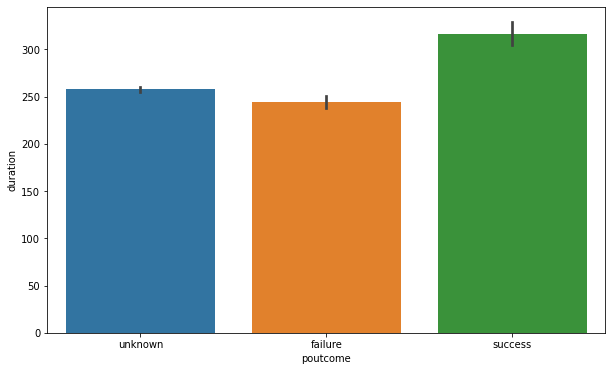

In [34]:
# Bar chart of "previous outcome" Vs "call duration"

plt.figure(figsize = (10,6))
sns.barplot(x='poutcome', y = 'duration', data = df_data)

In [35]:
# make a copy
bankcl = df_with_dummies

In [36]:
# The Correltion matrix
corr = bankcl.corr()
corr

,Id,age,duration,campaign,previous,default_cat,housing_cat,loan_cat,balance_cat,recent_pdays,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_success,poutcome_unknown
Id,1.000000,0.010182,0.013031,-0.102884,0.271098,-0.053098,-0.176143,-0.084240,NaN,0.085276,...,-0.023601,-0.070834,0.093709,-0.068318,-0.046493,0.107891,-0.007199,0.333718,0.263548,-0.433163
age,0.010182,1.000000,-0.004389,0.003452,0.000289,-0.016697,-0.168847,-0.015142,NaN,0.011574,...,0.150984,0.264898,-0.394918,0.179861,-0.088470,-0.072255,0.063766,-0.005550,0.032397,-0.011745
duration,0.013031,-0.004389,1.000000,-0.084570,0.001203,-0.010021,0.005075,-0.012412,NaN,-0.003196,...,0.006100,-0.022683,0.020328,-0.003660,0.002084,0.000891,-0.000682,-0.018925,0.042389,-0.004974
campaign,-0.102884,0.003452,-0.084570,1.000000,-0.032855,0.016822,-0.023599,0.009980,NaN,-0.023789,...,-0.015484,0.031371,-0.023120,0.009616,-0.020893,0.012866,0.005704,-0.088131,-0.057486,0.108153
previous,0.271098,0.000289,0.001203,-0.032855,1.000000,-0.018329,0.037076,-0.011043,NaN,0.099094,...,-0.004534,-0.012691,0.017006,-0.016705,-0.005603,0.022888,-0.008257,0.350627,0.201424,-0.416226
default_cat,-0.053098,-0.016697,-0.010021,0.016822,-0.018329,1.000000,-0.006025,0.077234,NaN,-0.009932,...,0.017777,-0.014460,0.003115,0.001623,0.013220,-0.015239,-0.001236,-0.026389,-0.023344,0.035542
housing_cat,-0.176143,-0.168847,0.005075,-0.023599,0.037076,-0.006025,1.000000,0.041323,NaN,-0.017263,...,0.001778,0.017681,-0.020475,0.010671,0.101659,-0.099175,-0.047595,0.106795,-0.091360,-0.048101
loan_cat,-0.084240,-0.015142,-0.012412,0.009980,-0.011043,0.077234,0.041323,1.000000,NaN,-0.005574,...,0.016377,0.036906,-0.051716,-0.012396,0.070625,-0.045940,-0.049992,-0.002186,-0.053713,0.029620
balance_cat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
recent_pdays,0.085276,0.011574,-0.003196,-0.023789,0.099094,-0.009932,-0.017263,-0.005574,NaN,1.000000,...,-0.006304,0.003896,0.000233,-0.010473,-0.008755,0.017972,-0.000294,0.064452,0.099985,-0.108946


Text(0.5, 1.0, 'Heatmap of Correlation Matrix')

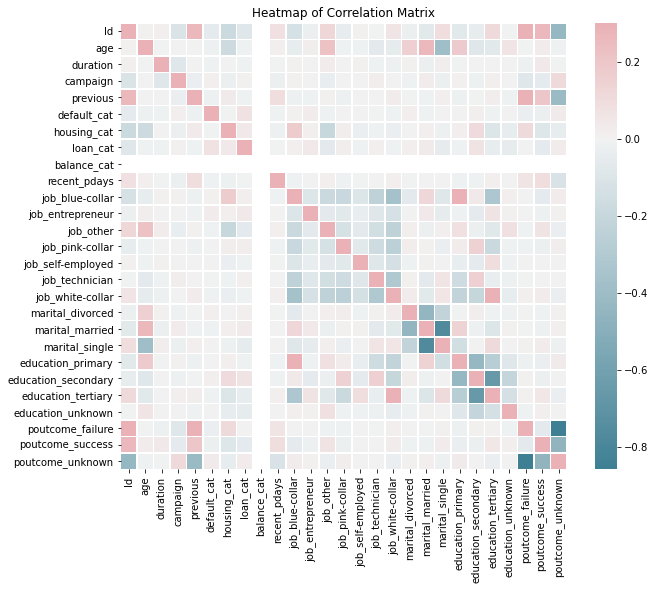

In [37]:
# Heatmap
plt.figure(figsize = (10,10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .82})
plt.title('Heatmap of Correlation Matrix')

In [38]:
# Extract the deposte_cat column (the dependent variable)
corr_balance = pd.DataFrame(corr['balance_cat'].drop('balance_cat'))
corr_balance.sort_values(by = 'balance_cat', ascending = False)

,balance_cat
Id,NaN
age,NaN
duration,NaN
campaign,NaN
previous,NaN
default_cat,NaN
housing_cat,NaN
loan_cat,NaN
recent_pdays,NaN
job_blue-collar,NaN


In [39]:
# Train-Test split: 20% test data
data_drop_balance = bankcl.drop('balance_cat', 1)
label = bankcl.balance_cat
data_train, data_test, label_train, label_test = train_test_split(data_drop_balance, label, test_size = 0.2, random_state = 50)